After the pretest, we have our data in the data.csv file

In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

df

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,...,red.1.player.q4_1,red.1.player.q4_2,red.1.player.q5_1,red.1.player.q5_2,red.1.player.q6_1,red.1.player.q6_2,red.1.player.q7_1,red.1.player.q7_2,red.1.group.id_in_subsession,red.1.subsession.round_number
0,1,kn4qvpgb,NaN,0,1,17,welcome,Welcome,2024-07-31 11:13:51.400424,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,2,rkavo23q,NaN,0,1,17,welcome,Welcome,2024-07-31 12:05:34.115890,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,3,0d2td99h,NaN,0,1,17,welcome,Welcome,2024-07-31 12:45:34.669748,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,4,uw1igmfl,NaN,0,1,17,welcome,Welcome,2024-07-31 12:45:35.955313,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,5,5g911uwt,NaN,0,9,17,blue,ThankYou,2024-07-31 12:46:02.351373,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
5,6,ome4j32l,NaN,0,1,17,welcome,Welcome,2024-07-31 14:13:16.618286,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
6,7,7pi20bzq,NaN,0,9,17,blue,ThankYou,2024-07-31 16:37:51.803592,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
7,8,oawey5ss,NaN,0,1,17,welcome,Welcome,2024-08-01 15:13:45.577871,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
8,9,gj2ntrpc,NaN,0,9,17,blue,ThankYou,2024-08-01 15:15:46.468590,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
9,10,5jpknrj0,NaN,0,1,17,welcome,Welcome,2024-08-01 15:59:26.640940,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


We will only consider the entires where the participants either completed the first task or both the tasks

In [3]:
filtered_df = df.loc[df['participant._current_page_name'].isin(['ThankYou', 'QuestionsDo', 'ScenarioDo'])]

filtered_df

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,...,red.1.player.q4_1,red.1.player.q4_2,red.1.player.q5_1,red.1.player.q5_2,red.1.player.q6_1,red.1.player.q6_2,red.1.player.q7_1,red.1.player.q7_2,red.1.group.id_in_subsession,red.1.subsession.round_number
4,5,5g911uwt,NaN,0,9,17,blue,ThankYou,2024-07-31 12:46:02.351373,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
6,7,7pi20bzq,NaN,0,9,17,blue,ThankYou,2024-07-31 16:37:51.803592,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
8,9,gj2ntrpc,NaN,0,9,17,blue,ThankYou,2024-08-01 15:15:46.468590,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
10,11,3xend1y2,NaN,0,9,17,blue,ThankYou,2024-08-01 15:59:48.458634,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
15,16,birzm1dd,NaN,0,17,17,red,ThankYou,2024-08-02 14:25:31.138797,1,...,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,1,1
18,19,h95oqnh2,NaN,0,9,17,blue,ThankYou,2024-08-02 15:30:58.752721,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
24,25,r8yf14ne,NaN,0,9,17,blue,ThankYou,2024-08-02 21:33:45.549383,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
26,27,2l2pe79a,NaN,0,9,17,blue,ThankYou,2024-08-02 21:46:50.013049,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
32,33,0vu19lr7,NaN,0,9,17,blue,ThankYou,2024-08-04 11:28:27.207896,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
33,34,9b1s23h7,NaN,0,17,17,red,ThankYou,2024-08-04 12:56:45.810635,1,...,4.0,2.0,5.0,4.0,5.0,5.0,4.0,4.0,1,1


Let's clean the data into the columns ['serial_number', 'participant_code', 'app_type', 'is_polite_chatbot', 'conversation_history', 'answer', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7'] for further use.

The column 'my_politeness_assignment' identifies the polite version of the chatbot during the experiment. If it is set to 2, then the first task had the polite version of the chatbot. Else, the second task.

In [4]:
new_columns = ['serial_number', 'participant_code', 'app_type', 'is_polite_chatbot', 'conversation_history', 'answer', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7']
my_df = pd.DataFrame(columns=new_columns)

# Initialize the serial number
serial_number = 0

def create_chatbot_entry(serial_number, row, participant_code, app_type, is_polite, conversation_history, prefix, q_suffix):
    return {
        'serial_number': serial_number+1,
        'participant_code': participant_code,
        'app_type': app_type,
        'is_polite_chatbot': is_polite,
        'conversation_history': conversation_history,
        'answer': row[prefix + 'answer' + q_suffix],
        'q1': row[prefix + 'q1_' + q_suffix],
        'q2': row[prefix + 'q2_' + q_suffix],
        'q3': row[prefix + 'q3_' + q_suffix],
        'q4': row[prefix + 'q4_' + q_suffix],
        'q5': row[prefix + 'q5_' + q_suffix],
        'q6': row[prefix + 'q6_' + q_suffix],
        'q7': row[prefix + 'q7_' + q_suffix],
    }

# Iterate over the filtered DataFrame rows
for _, row in filtered_df.iterrows():
    participant_code = row['participant.code']
    app_type = row['participant._current_app_name']
    current_page_name = row['participant._current_page_name']
    my_politeness_assignment = row[f'{app_type}.1.player.my_politeness_assignment']
    
    if my_politeness_assignment == 2:
        polite_chatbot = create_chatbot_entry(
            serial_number, row, participant_code, app_type, True,
            row[f'{app_type}.1.player.conversation_history_ek'],
            f'{app_type}.1.player.', '1'
        )
        neutral_chatbot = create_chatbot_entry(
            serial_number + 1, row, participant_code, app_type, False,
            row[f'{app_type}.1.player.conversation_history_do'],
            f'{app_type}.1.player.', '2'
        )
    else:
        polite_chatbot = create_chatbot_entry(
            serial_number, row, participant_code, app_type, True,
            row[f'{app_type}.1.player.conversation_history_do'],
            f'{app_type}.1.player.', '2'
        )
        neutral_chatbot = create_chatbot_entry(
            serial_number + 1, row, participant_code, app_type, False,
            row[f'{app_type}.1.player.conversation_history_ek'],
            f'{app_type}.1.player.', '1'
        )
            
    if current_page_name == 'ScenarioDo':
        if polite_chatbot['q1']:
            my_df = my_df.append(polite_chatbot, ignore_index=True)
        else:
            my_df = my_df.append(neutral_chatbot, ignore_index=True)
    elif current_page_name == 'ThankYou':
        my_df = my_df.append(polite_chatbot, ignore_index=True)
        my_df = my_df.append(neutral_chatbot, ignore_index=True)
        
    serial_number += 2
        
my_df

,serial_number,participant_code,app_type,is_polite_chatbot,conversation_history,answer,q1,q2,q3,q4,q5,q6,q7
0,1,5g911uwt,blue,True,"[{""role"": ""user"", ""content"": ""hi, i want to se...",DP Daily Face Cleanser (100ml) - €18 DP Light...,3.0,5.0,5.0,2.0,5.0,4.0,4.0
1,2,5g911uwt,blue,False,"[{""role"": ""user"", ""content"": ""I want to purcha...",1. DP Sunscreen Lotion SPF 50 – 100ml for €25....,4.0,5.0,5.0,4.0,5.0,5.0,4.0
2,3,7pi20bzq,blue,True,"[{""role"": ""user"", ""content"": ""Give me a list o...",1. **DP Sunscreen Lotion SPF 50** (100ml) - €2...,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,7pi20bzq,blue,False,"[{""role"": ""user"", ""content"": ""Recommend some p...",Here’s a product list that meets your criteria...,4.0,4.0,4.0,3.0,5.0,5.0,4.0
4,5,gj2ntrpc,blue,True,"[{""role"": ""user"", ""content"": ""Hi!\n\nPlease re...","Hello! To combat dry, sensitive skin during yo...",4.0,4.0,4.0,3.0,4.0,4.0,4.0
5,6,gj2ntrpc,blue,False,"[{""role"": ""user"", ""content"": ""Hi,\n\n1. Please...",For sunscreens with a minimum of 50 SPF: 1....,4.0,4.0,4.0,4.0,4.0,4.0,4.0
6,7,3xend1y2,blue,True,"[{""role"": ""user"", ""content"": ""Hello, I am look...",I would recommend the DP Hydrating Facial Mist...,5.0,5.0,5.0,5.0,5.0,5.0,5.0
7,8,3xend1y2,blue,False,"[{""role"": ""user"", ""content"": ""Hello! I am look...",- DP Sunscreen Lotion SPF 50 - DP Hydrating F...,5.0,5.0,5.0,5.0,5.0,5.0,5.0
8,9,birzm1dd,red,True,"[{""role"": ""user"", ""content"": ""Hi, can you sugg...",1. **DP Sunscreen Lotion SPF 50**: This broad-...,5.0,5.0,4.0,4.0,4.0,4.0,4.0
9,10,birzm1dd,red,False,"[{""role"": ""user"", ""content"": ""Hi, can you reco...",I wanna get: 1x DP Lightweight Moisturizer 1...,5.0,5.0,5.0,4.0,4.0,5.0,4.0


In [5]:
import json

# Now we want to get the number of 'user' messages from each conversation
def count_user_messages(conversation_history):
    messages = json.loads(conversation_history)
    return sum(1 for message in messages if message['role'] == 'user')

my_df['user_message_count'] = my_df['conversation_history'].apply(count_user_messages)

# Also, lets make the polite participant identifier boolean
my_df['is_polite_participant'] = my_df['app_type'].map({'red': True, 'blue': False})

my_df

,serial_number,participant_code,app_type,is_polite_chatbot,conversation_history,answer,q1,q2,q3,q4,q5,q6,q7,user_message_count,is_polite_participant
0,1,5g911uwt,blue,True,"[{""role"": ""user"", ""content"": ""hi, i want to se...",DP Daily Face Cleanser (100ml) - €18 DP Light...,3.0,5.0,5.0,2.0,5.0,4.0,4.0,5,False
1,2,5g911uwt,blue,False,"[{""role"": ""user"", ""content"": ""I want to purcha...",1. DP Sunscreen Lotion SPF 50 – 100ml for €25....,4.0,5.0,5.0,4.0,5.0,5.0,4.0,1,False
2,3,7pi20bzq,blue,True,"[{""role"": ""user"", ""content"": ""Give me a list o...",1. **DP Sunscreen Lotion SPF 50** (100ml) - €2...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1,False
3,4,7pi20bzq,blue,False,"[{""role"": ""user"", ""content"": ""Recommend some p...",Here’s a product list that meets your criteria...,4.0,4.0,4.0,3.0,5.0,5.0,4.0,3,False
4,5,gj2ntrpc,blue,True,"[{""role"": ""user"", ""content"": ""Hi!\n\nPlease re...","Hello! To combat dry, sensitive skin during yo...",4.0,4.0,4.0,3.0,4.0,4.0,4.0,1,False
5,6,gj2ntrpc,blue,False,"[{""role"": ""user"", ""content"": ""Hi,\n\n1. Please...",For sunscreens with a minimum of 50 SPF: 1....,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1,False
6,7,3xend1y2,blue,True,"[{""role"": ""user"", ""content"": ""Hello, I am look...",I would recommend the DP Hydrating Facial Mist...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,15,False
7,8,3xend1y2,blue,False,"[{""role"": ""user"", ""content"": ""Hello! I am look...",- DP Sunscreen Lotion SPF 50 - DP Hydrating F...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8,False
8,9,birzm1dd,red,True,"[{""role"": ""user"", ""content"": ""Hi, can you sugg...",1. **DP Sunscreen Lotion SPF 50**: This broad-...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,2,True
9,10,birzm1dd,red,False,"[{""role"": ""user"", ""content"": ""Hi, can you reco...",I wanna get: 1x DP Lightweight Moisturizer 1...,5.0,5.0,5.0,4.0,4.0,5.0,4.0,3,True


In [10]:
# Now, lets split the dataset into our four treatments

neutral_participant_polite_chatbot = my_df[(my_df['is_polite_participant'] == False) & (my_df['is_polite_chatbot'] == True)]
neutral_participant_neutral_chatbot = my_df[(my_df['is_polite_participant'] == False) & (my_df['is_polite_chatbot'] == False)]
polite_participant_polite_chatbot = my_df[(my_df['is_polite_participant'] == True) & (my_df['is_polite_chatbot'] == True)]
polite_participant_neutral_chatbot = my_df[(my_df['is_polite_participant'] == True) & (my_df['is_polite_chatbot'] == False)]

In [11]:
print("Neutral Participant with Neutral chatbot:")
neutral_participant_neutral_chatbot.describe()

Neutral Participant with Neutral chatbot:


,q1,q2,q3,q4,q5,q6,q7,user_message_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.300000,4.400000,4.200000,3.700000,4.300000,4.500000,4.000000,3.700000
std,0.483046,0.516398,0.421637,0.823273,0.674949,0.707107,0.666667,3.433495
min,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,3.000000,1.000000
25%,4.000000,4.000000,4.000000,3.250000,4.000000,4.000000,4.000000,1.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,2.000000
75%,4.750000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,6.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [12]:
print("Neutral Participant with Polite chatbot:")
neutral_participant_polite_chatbot.describe()

Neutral Participant with Polite chatbot:


,q1,q2,q3,q4,q5,q6,q7,user_message_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.200000,4.200000,4.200000,3.500000,4.200000,4.200000,4.000000,4.700000
std,0.632456,0.788811,0.421637,0.971825,0.788811,0.788811,0.666667,4.270051
min,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,1.000000
25%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.750000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,15.000000


In [13]:
print("Polite Participant with Neutral chatbot:")
polite_participant_neutral_chatbot.describe()

Polite Participant with Neutral chatbot:


,q1,q2,q3,q4,q5,q6,q7,user_message_count
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.000000,3.875000,3.875000,3.250000,3.625000,4.000000,3.750000,2.375000
std,1.414214,1.642081,1.807722,1.669046,1.407886,1.603567,1.488048,1.685018
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.750000,2.750000,3.250000,1.750000,3.500000,3.500000,3.500000,1.000000
50%,4.500000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000
75%,5.000000,5.000000,5.000000,4.250000,4.250000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000


In [14]:
print("Polite Participant with Polite chatbot:")
polite_participant_polite_chatbot.describe()

Polite Participant with Polite chatbot:


,q1,q2,q3,q4,q5,q6,q7,user_message_count
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000
mean,4.000000,4.125000,3.875000,3.75000,3.875000,3.875000,3.75000,2.875000
std,1.414214,1.457738,1.356203,1.28174,1.356203,1.356203,1.28174,2.416461
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.000000
25%,3.750000,3.750000,3.750000,3.75000,3.750000,3.750000,3.75000,1.750000
50%,4.500000,5.000000,4.000000,4.00000,4.000000,4.000000,4.00000,2.500000
75%,5.000000,5.000000,5.000000,4.25000,5.000000,5.000000,4.25000,3.250000
max,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,8.000000


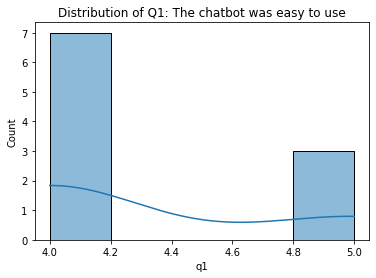

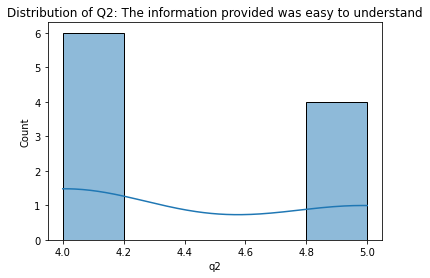

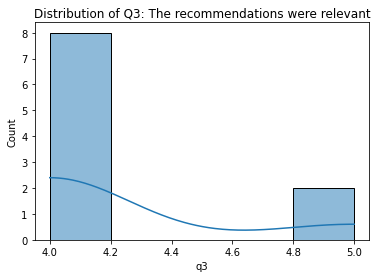

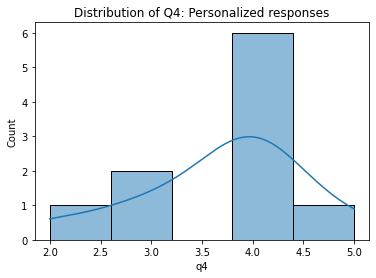

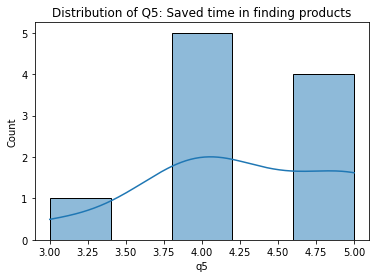

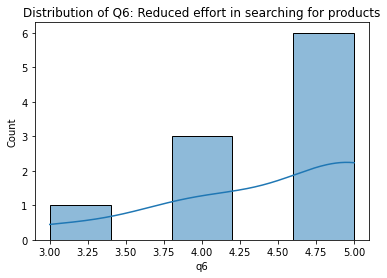

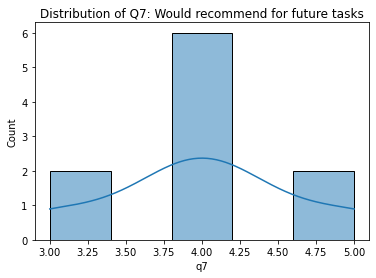

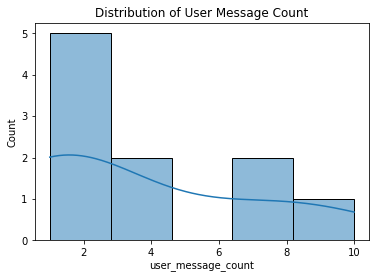

In [15]:
# Now, let's plot the distribution per group for better exploration:

import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column, title):
    sns.histplot(df[column], kde=True)
    plt.title(title)
    plt.show()
    
plot_distribution(neutral_participant_neutral_chatbot, 'q1', 'Distribution of Q1: The chatbot was easy to use')
plot_distribution(neutral_participant_neutral_chatbot, 'q2', 'Distribution of Q2: The information provided was easy to understand')
plot_distribution(neutral_participant_neutral_chatbot, 'q3', 'Distribution of Q3: The recommendations were relevant')
plot_distribution(neutral_participant_neutral_chatbot, 'q4', 'Distribution of Q4: Personalized responses')
plot_distribution(neutral_participant_neutral_chatbot, 'q5', 'Distribution of Q5: Saved time in finding products')
plot_distribution(neutral_participant_neutral_chatbot, 'q6', 'Distribution of Q6: Reduced effort in searching for products')
plot_distribution(neutral_participant_neutral_chatbot, 'q7', 'Distribution of Q7: Would recommend for future tasks')
plot_distribution(neutral_participant_neutral_chatbot, 'user_message_count', 'Distribution of User Message Count')

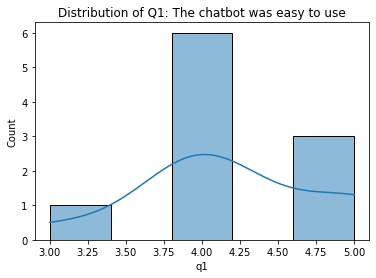

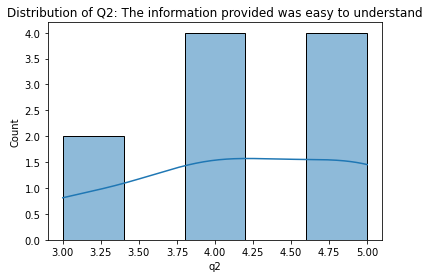

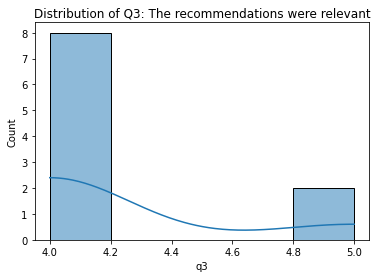

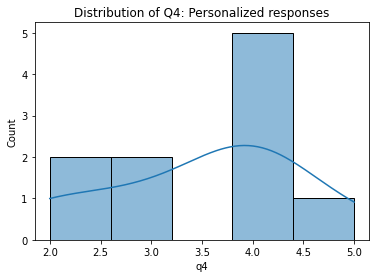

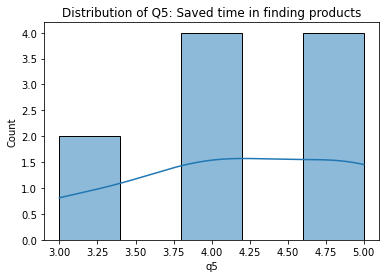

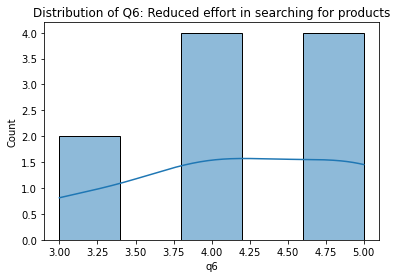

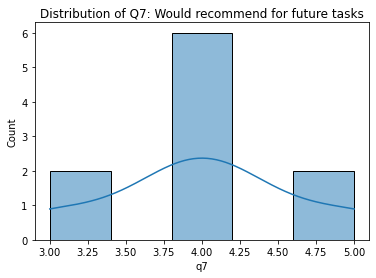

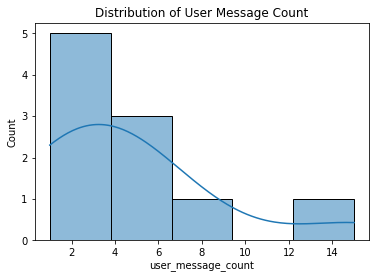

In [16]:
plot_distribution(neutral_participant_polite_chatbot, 'q1', 'Distribution of Q1: The chatbot was easy to use')
plot_distribution(neutral_participant_polite_chatbot, 'q2', 'Distribution of Q2: The information provided was easy to understand')
plot_distribution(neutral_participant_polite_chatbot, 'q3', 'Distribution of Q3: The recommendations were relevant')
plot_distribution(neutral_participant_polite_chatbot, 'q4', 'Distribution of Q4: Personalized responses')
plot_distribution(neutral_participant_polite_chatbot, 'q5', 'Distribution of Q5: Saved time in finding products')
plot_distribution(neutral_participant_polite_chatbot, 'q6', 'Distribution of Q6: Reduced effort in searching for products')
plot_distribution(neutral_participant_polite_chatbot, 'q7', 'Distribution of Q7: Would recommend for future tasks')
plot_distribution(neutral_participant_polite_chatbot, 'user_message_count', 'Distribution of User Message Count')

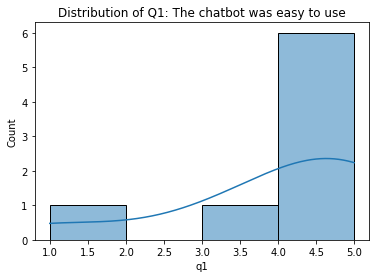

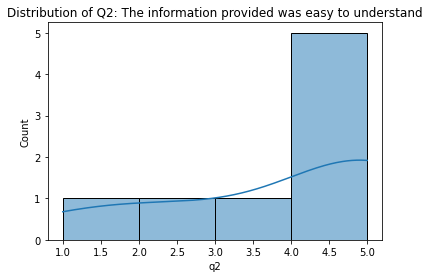

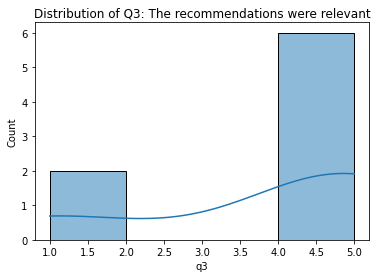

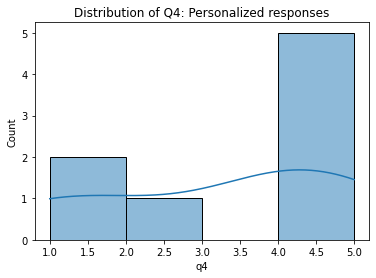

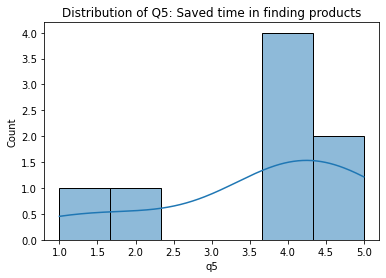

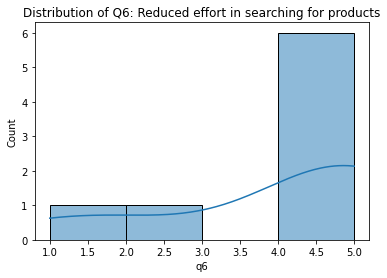

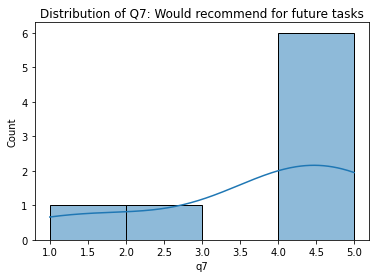

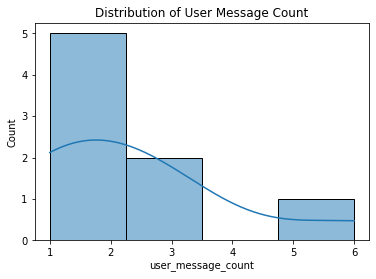

In [18]:
plot_distribution(polite_participant_neutral_chatbot, 'q1', 'Distribution of Q1: The chatbot was easy to use')
plot_distribution(polite_participant_neutral_chatbot, 'q2', 'Distribution of Q2: The information provided was easy to understand')
plot_distribution(polite_participant_neutral_chatbot, 'q3', 'Distribution of Q3: The recommendations were relevant')
plot_distribution(polite_participant_neutral_chatbot, 'q4', 'Distribution of Q4: Personalized responses')
plot_distribution(polite_participant_neutral_chatbot, 'q5', 'Distribution of Q5: Saved time in finding products')
plot_distribution(polite_participant_neutral_chatbot, 'q6', 'Distribution of Q6: Reduced effort in searching for products')
plot_distribution(polite_participant_neutral_chatbot, 'q7', 'Distribution of Q7: Would recommend for future tasks')
plot_distribution(polite_participant_neutral_chatbot, 'user_message_count', 'Distribution of User Message Count')

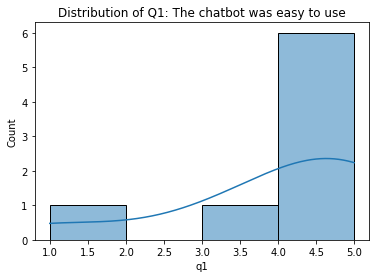

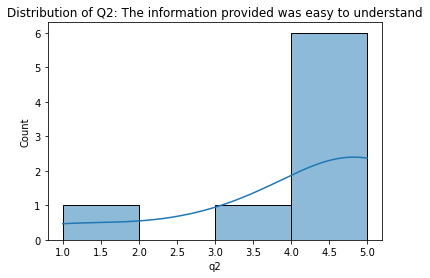

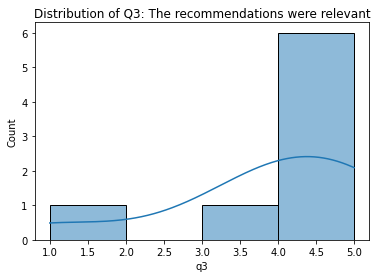

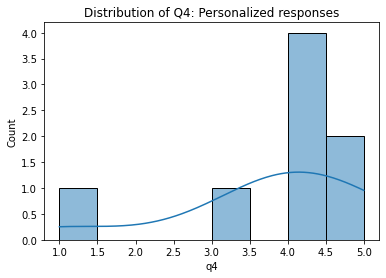

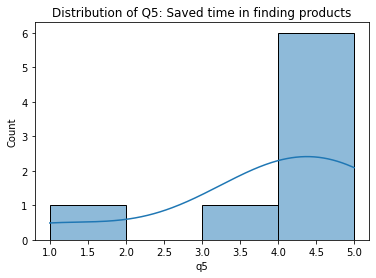

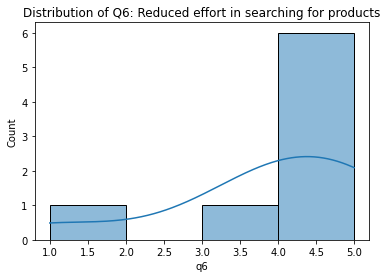

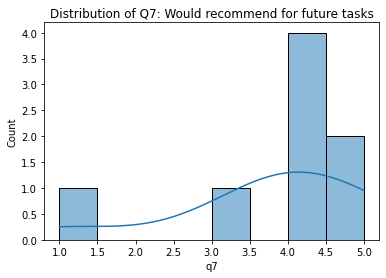

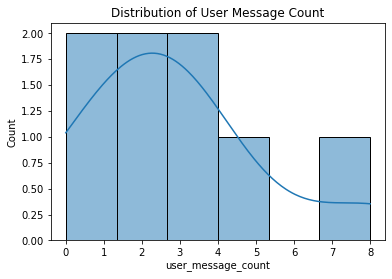

In [17]:
plot_distribution(polite_participant_polite_chatbot, 'q1', 'Distribution of Q1: The chatbot was easy to use')
plot_distribution(polite_participant_polite_chatbot, 'q2', 'Distribution of Q2: The information provided was easy to understand')
plot_distribution(polite_participant_polite_chatbot, 'q3', 'Distribution of Q3: The recommendations were relevant')
plot_distribution(polite_participant_polite_chatbot, 'q4', 'Distribution of Q4: Personalized responses')
plot_distribution(polite_participant_polite_chatbot, 'q5', 'Distribution of Q5: Saved time in finding products')
plot_distribution(polite_participant_polite_chatbot, 'q6', 'Distribution of Q6: Reduced effort in searching for products')
plot_distribution(polite_participant_polite_chatbot, 'q7', 'Distribution of Q7: Would recommend for future tasks')
plot_distribution(polite_participant_polite_chatbot, 'user_message_count', 'Distribution of User Message Count')

In [79]:
# Let's take the mean of the answers to a new column to answer our RQ

my_df['satisfaction'] = my_df[['q1', 'q2', 'q4']].mean(axis=1)

my_df['product_satisfaction'] = my_df[['q3', 'q4']].mean(axis=1)

my_df['interaction_duration'] = my_df['user_message_count']

my_df['future_use'] = my_df[['q5', 'q6', 'q7']].mean(axis=1)

In [80]:
# H1 Polite chatbot interactions increase the overall user satisfaction.

import scipy.stats as stats

# T-Test to compare satisfaction means
polite_satisfaction = my_df[my_df['is_polite_chatbot'] == True]['satisfaction']
neutral_satisfaction = my_df[my_df['is_polite_chatbot'] == False]['satisfaction']

t_stat, p_value = stats.ttest_ind(polite_satisfaction, neutral_satisfaction)

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")

# Check means for comparison
print(f"Mean satisfaction (polite chatbot): {polite_satisfaction.mean()}")
print(f"Mean satisfaction (neutral chatbot): {neutral_satisfaction.mean()}")

T-Test Results: t-statistic = 0.054994298680742876, p-value = 0.9564648995889138
Mean satisfaction (polite chatbot): 3.962962962962963
Mean satisfaction (neutral chatbot): 3.9444444444444446


In [81]:
# H2 Politeness in chatbots increases the likelihood of future use by the users.

polite_satisfaction = my_df[my_df['is_polite_chatbot'] == True]['future_use']
neutral_satisfaction = my_df[my_df['is_polite_chatbot'] == False]['future_use']

t_stat, p_value = stats.ttest_ind(polite_satisfaction, neutral_satisfaction)

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Mean future_use (polite chatbot): {polite_satisfaction.mean()}")
print(f"Mean future_use (neutral chatbot): {neutral_satisfaction.mean()}")

T-Test Results: t-statistic = -0.16285288097677103, p-value = 0.8715983631692377
Mean future_use (polite chatbot): 4.0
Mean future_use (neutral chatbot): 4.055555555555555


In [88]:
# H3 The users when asked to be polite, have longer interactions with polite chatbot.

polite_participants = my_df[my_df['is_polite_participant'] == True]

# T-Test to compare interaction duration means for polite participants
polite_chatbot_interaction = polite_participants[polite_participants['is_polite_chatbot'] == True]['interaction_duration']
neutral_chatbot_interaction = polite_participants[polite_participants['is_polite_chatbot'] == False]['interaction_duration']

t_stat, p_value = stats.ttest_ind(polite_chatbot_interaction, neutral_chatbot_interaction)

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Mean interaction_duration (polite chatbot): {polite_chatbot_interaction.mean()}")
print(f"Mean interaction_duration (neutral chatbot): {neutral_chatbot_interaction.mean()}")

T-Test Results: t-statistic = 0.4800548665487303, p-value = 0.6386022579816168
Mean interaction_duration (polite chatbot): 2.875
Mean interaction_duration (neutral chatbot): 2.375


In [87]:
# H4 The users are more satisfied when asked to be polite, regardless of the chatbot.

polite_participant_satisfaction = my_df[my_df['is_polite_participant'] == True]['satisfaction']
neutral_participant_satisfaction = my_df[my_df['is_polite_participant'] == False]['satisfaction']

t_stat, p_value = stats.ttest_ind(polite_participant_satisfaction, neutral_participant_satisfaction)

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Mean satisfaction (polite participant): {polite_participant_satisfaction.mean()}")
print(f"Mean satisfaction (neutral participant): {neutral_participant_satisfaction.mean()}")

T-Test Results: t-statistic = 0.4800548665487303, p-value = 0.6386022579816168
Mean interaction_duration (polite chatbot): 2.875
Mean interaction_duration (neutral chatbot): 2.375


In [84]:
# H5 Users find product recommendations from polite chatbots more trustworthy.

polite_chatbot_trustworthiness = my_df[my_df['is_polite_chatbot'] == True]['product_satisfaction']
neutral_chatbot_trustworthiness = my_df[my_df['is_polite_chatbot'] == False]['product_satisfaction']

t_stat, p_value = stats.ttest_ind(polite_chatbot_trustworthiness, neutral_chatbot_trustworthiness)

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Mean trustworthiness (polite chatbot): {polite_chatbot_trustworthiness.mean()}")
print(f"Mean trustworthiness (neutral chatbot): {neutral_chatbot_trustworthiness.mean()}")

T-Test Results: t-statistic = 0.158463821945527, p-value = 0.8750288107245976
Mean trustworthiness (polite chatbot): 3.8333333333333335
Mean trustworthiness (neutral chatbot): 3.7777777777777777


In [85]:
# We could have also used the Regression Analysis

model_h1 = smf.ols('satisfaction ~ is_polite_chatbot + is_polite_participant', data=my_df).fit()
model_h2 = smf.ols('future_use ~ is_polite_chatbot + is_polite_participant', data=my_df).fit()
model_h3 = smf.ols('interaction_duration ~ is_polite_chatbot + is_polite_participant', data=my_df).fit()
model_h4 = smf.ols('satisfaction ~ is_polite_chatbot + is_polite_participant', data=my_df).fit()
model_h5 = smf.ols('product_satisfaction ~ is_polite_chatbot + is_polite_participant', data=my_df).fit()

# Print the summary of each model
print(model_h1.summary())
print(model_h2.summary())
print(model_h3.summary())
print(model_h4.summary())
print(model_h5.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.2023
Date:                Mon, 05 Aug 2024   Prob (F-statistic):              0.818
Time:                        18:17:12   Log-Likelihood:                -50.201
No. Observations:                  36   AIC:                             106.4
Df Residuals:                      33   BIC:                             111.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     